In [1]:
import numpy as np
import pandas as pd

In [2]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["s1",'s2','s3','s4','s5'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["s1",'s2','s3','s4','s5'])

df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))
df = df.drop_duplicates()# get all unique records
print(len(df))
df.head()

1040000
203740


,s1,s2,s3,s4,s5
0,90,97,80,86,87
1,95,82,96,81,97
2,84,83,96,95,82
3,98,83,93,97,89
4,82,81,85,90,99


In [3]:
def grade(sb1,sb2, sb3, sb4, sb5):
    total = 500
    obtain = sb1 + sb2 + sb3 + sb4 + sb5
    per = (obtain / total) * 100
    
    grade = None
    
    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade = "B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    elif per >= 33:
        grade = "E"
    else:
        grade = "Fail"
        
    return total, obtain , per , grade

# df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,90,97,80,86,87,500,440,88.0,A+
1,95,82,96,81,97,500,451,90.2,A+
2,84,83,96,95,82,500,440,88.0,A+
3,98,83,93,97,89,500,460,92.0,A+
4,82,81,85,90,99,500,437,87.4,A+
...,...,...,...,...,...,...,...,...,...
39995,25,7,11,27,13,500,83,16.6,Fail
39996,22,19,30,17,25,500,113,22.6,Fail
39997,15,3,11,2,0,500,31,6.2,Fail
39998,29,11,6,10,30,500,86,17.2,Fail


In [4]:
df.Grade.value_counts()

Fail    39963
A+      39723
A       29111
D       29088
C       29081
B       28998
E        7776
Name: Grade, dtype: int64

<Axes: >

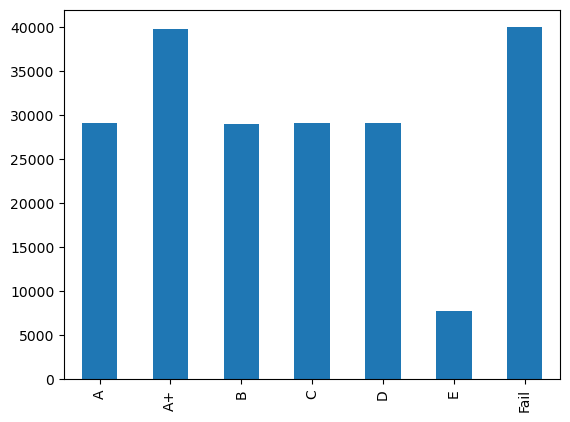

In [5]:
df.Grade.value_counts().sort_index().plot(kind='bar')

In [6]:
df[df.duplicated()]

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade


In [7]:
df.Grade.unique()

array(['A+', 'A', 'B', 'C', 'D', 'E', 'Fail'], dtype=object)

In [8]:
df[df.Grade=='B']

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
0,62,65,66,67,63,500,323,64.6,B
1,61,62,61,65,63,500,312,62.4,B
2,65,68,65,60,60,500,318,63.6,B
3,61,65,60,68,62,500,316,63.2,B
4,63,63,66,63,64,500,319,63.8,B
...,...,...,...,...,...,...,...,...,...
39990,63,66,68,62,60,500,319,63.8,B
39992,62,61,62,67,65,500,317,63.4,B
39993,62,65,61,66,65,500,319,63.8,B
39998,60,63,60,63,61,500,307,61.4,B


In [9]:
df1 = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    df1 = pd.concat([df1,df[df.Grade==i].head(7676)]) # train
    test = pd.concat([test,df[df.Grade==i].tail(100)]) #test
print(len(df1), 7676*7)
print(len(test))

53732 53732
700


In [10]:
df1.head().sample(frac=1)

,s1,s2,s3,s4,s5,Total,Obtained,Percentage,Grade
3,98,83,93,97,89,500,460,92.0,A+
2,84,83,96,95,82,500,440,88.0,A+
1,95,82,96,81,97,500,451,90.2,A+
0,90,97,80,86,87,500,440,88.0,A+
4,82,81,85,90,99,500,437,87.4,A+


In [11]:
data = df1[["s1","s2","s3",'s4','s5','Grade']].copy()
data = data.sample(frac=1)
data

,s1,s2,s3,s4,s5,Grade
12298,34,33,37,34,37,E
1129,38,35,37,37,33,E
5599,47,43,43,48,42,D
819,53,50,55,55,58,C
7982,56,54,53,55,57,C
...,...,...,...,...,...,...
1958,37,36,35,34,38,E
5734,22,14,20,31,3,Fail
1073,27,0,27,25,12,Fail
7749,33,36,36,36,34,E


In [12]:
X = data.loc[:,"s1":"s5"]
X

,s1,s2,s3,s4,s5
12298,34,33,37,34,37
1129,38,35,37,37,33
5599,47,43,43,48,42
819,53,50,55,55,58
7982,56,54,53,55,57
...,...,...,...,...,...
1958,37,36,35,34,38
5734,22,14,20,31,3
1073,27,0,27,25,12
7749,33,36,36,36,34


In [13]:
Y = data['Grade']
Y

12298       E
1129        E
5599        D
819         C
7982        C
         ... 
1958        E
5734     Fail
1073     Fail
7749        E
6327     Fail
Name: Grade, Length: 53732, dtype: object

In [14]:
Y1 = pd.get_dummies(Y)
Y1

,A,A+,B,C,D,E,Fail
12298,0,0,0,0,0,1,0
1129,0,0,0,0,0,1,0
5599,0,0,0,0,1,0,0
819,0,0,0,1,0,0,0
7982,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
1958,0,0,0,0,0,1,0
5734,0,0,0,0,0,0,1
1073,0,0,0,0,0,0,1
7749,0,0,0,0,0,1,0


In [15]:
Y1.drop_duplicates()

,A,A+,B,C,D,E,Fail
12298,0,0,0,0,0,1,0
5599,0,0,0,0,1,0,0
819,0,0,0,1,0,0,0
5758,0,0,1,0,0,0,0
1216,0,0,0,0,0,0,1
5576,1,0,0,0,0,0,0
5122,0,1,0,0,0,0,0


In [16]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [17]:
print(X.head(1).values[0])
print(X.head(1).values[0].shape)

[34 33 37 34 37]
(5,)


In [18]:
model = Sequential()

#               32  = output should be power 2 value 2,4,8,16,32,......
model.add(Dense(32 , activation='relu' ,input_shape=(5,))) #input layer
model.add(Dense(16, activation='relu')) # hidden layer
model.add(Dense(7, activation='softmax'))# outlayer 7= unique output classes, softmax->7 probility this sum always = 1

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 7)                 119       
                                                                 
Total params: 839 (3.28 KB)
Trainable params: 839 (3.28 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer=SGD(learning_rate=0.002), 
              loss='categorical_crossentropy',
              metrics=['acc'])


In [22]:
model.fit(X,Y1, epochs=80)

Epoch 1/80
1680/1680 [==============================] - 4s 1ms/step - loss: 1.8145 - acc: 0.2313
Epoch 2/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.4584 - acc: 0.3273
Epoch 3/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.3930 - acc: 0.3410
Epoch 4/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.3410 - acc: 0.3657
Epoch 5/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.3065 - acc: 0.4032
Epoch 6/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.2695 - acc: 0.4631
Epoch 7/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.2408 - acc: 0.5093
Epoch 8/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.2133 - acc: 0.5423
Epoch 9/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.1869 - acc: 0.5619
Epoch 10/80
1680/1680 [==============================] - 2s 1ms/step - loss: 1.1621 - acc: 0.5854
Epoch 11/80
1680/1680 [======

In [24]:
test[["Total","Obtained","Percentage","Grade"]] = test[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
test.head()

test_X, test_Y = test.loc[:,"s1":"s5"], pd.get_dummies(test['Grade'])
display(test_X)
display(test_Y)

,s1,s2,s3,s4,s5
39900,82,93,83,98,83
39901,91,87,98,97,85
39902,91,85,84,92,95
39903,88,87,95,90,97
39904,98,85,94,87,86
...,...,...,...,...,...
39995,25,7,11,27,13
39996,22,19,30,17,25
39997,15,3,11,2,0
39998,29,11,6,10,30


,A,A+,B,C,D,E,Fail
39900,0,1,0,0,0,0,0
39901,0,1,0,0,0,0,0
39902,0,1,0,0,0,0,0
39903,0,1,0,0,0,0,0
39904,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
39995,0,0,0,0,0,0,1
39996,0,0,0,0,0,0,1
39997,0,0,0,0,0,0,1
39998,0,0,0,0,0,0,1


In [25]:
model.evaluate(test_X,test_Y)

22/22 [==============================] - 0s 3ms/step - loss: 0.3300 - acc: 0.9200


[0.33001598715782166, 0.9200000166893005]